# **Imports**

Taken from : https://www.kaggle.com/datasets/utkarshsaxenadn/weather-classification-resnet152v2

In [3]:
"""remove tensorflow & keras warning informations"""
import logging
logging.getLogger("tensorflow").setLevel(logging.WARNING)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  #or {'0', '1', '2'}


In [4]:
# Common
import keras
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm

# Data
from tensorflow.image import resize
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.utils import load_img, img_to_array

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# TL Model
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception, ResNet152, ResNet152V2

# Model
from keras import Sequential
from keras.layers import Dense, GlobalAvgPool2D, Dropout
from keras.models import load_model

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Performance
from sklearn.metrics import classification_report

# Model Viz
from tensorflow.keras.utils import plot_model

# Data and utilities

In [5]:
# Cateories
class_names = {0: 'cloudy', 1: 'foggy', 2: 'rainy', 3: 'shine', 4: 'sunrise'}

In [6]:
def load_image(path):
    '''
    Takes in path of the image and load it
    '''
    img = resize(img_to_array(load_img(path))/255., (256,256))
    return img

In [7]:
def show_image(image, title=None):
    '''
    Takes in an Image and plot it with Matplotlib
    '''
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [8]:
def load_data(img_paths):
    X = np.zeros(shape=(len(img_paths), 256,256,3))

    for i, path in tqdm(enumerate(img_paths), desc="Loading"):
        X[i] = load_image(path)
    
    return X

# Load images

In [9]:
image_paths = sorted(glob('test_images/*.jpg'))
print(f"Total Number of Images : {len(image_paths)}")

Total Number of Images : 6


In [10]:
image_paths[:5]

['test_images/cloudy1.jpg',
 'test_images/foggy1.jpg',
 'test_images/rain36.jpg',
 'test_images/rain53.jpg',
 'test_images/shine10.jpg']

In [11]:
images = load_data(image_paths)

Loading: 6it [00:00, 10.42it/s]


# **Data Viz**

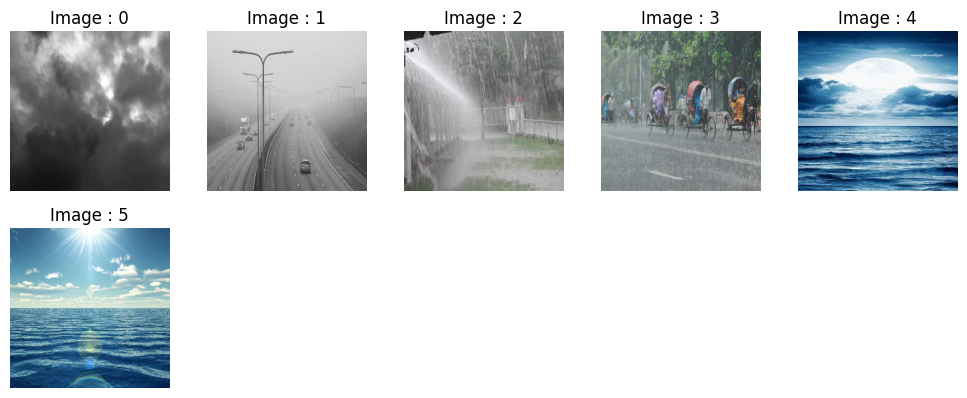

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    
    if i > len(images)-1:
        break
    
    image = images[i]

    plt.subplot(5,5,i+1)
    show_image(image, title=f"Image : {i}")
plt.tight_layout()
plt.show()

# Prediction with pre-trained ResNet152V2 model

In [13]:
# Load model
model_v3 = load_model('/Users/arthusrouhi/Downloads/weather-classification-app/model/ResNet152V2-Weather-Classification-03.h5')

In [14]:
# Make Predictions
preds = np.argmax(model_v3.predict(images), axis=-1)

1/1 [==============================] - 6s 6s/step


# Result

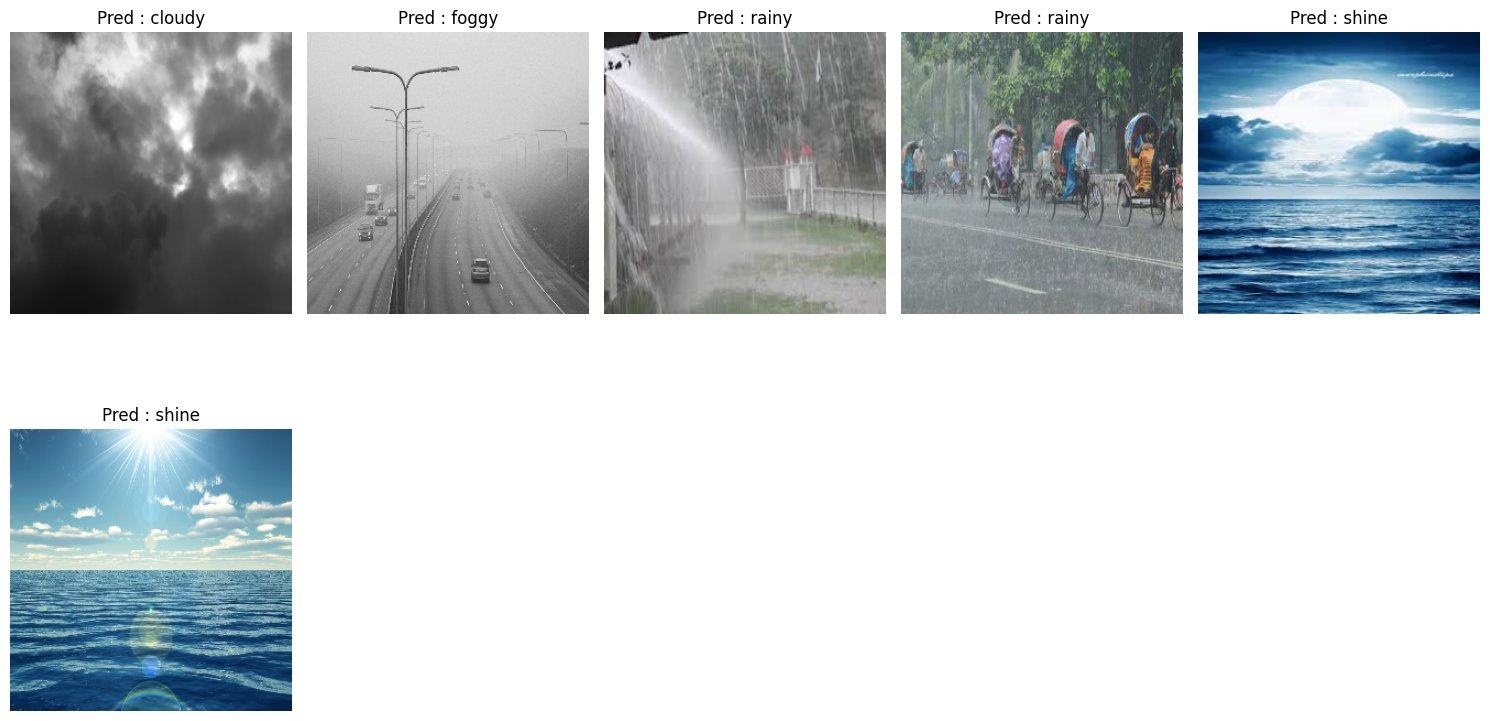

In [15]:
plt.figure(figsize=(15,20))
for i, im in enumerate(images):

    # Make Prediction
    pred = class_names[list(preds)[i]]
    
    # Show Prediction
    plt.subplot(5,5,i+1)
    show_image(im, title=f"Pred : {pred}")
    
    
plt.tight_layout()
plt.show()

In [16]:
import datetime
import os

preds.tolist()
def get_pred(preds: list):
    
    return [class_names[pred] for pred in preds]

prediction_label = get_pred(preds)
prediction_label

pred = pd.DataFrame({"image_name": image_paths, "prediction_label": prediction_label})
pred

date =  datetime.datetime.now().strftime("%Hh%M_%m-%d-%Y")
path = "/Users/arthusrouhi/Downloads/weather-classification-app/output"
pred.to_csv(os.path.join(path, "output-"+ date +".csv"))

In [17]:
prediction_label

['cloudy', 'foggy', 'rainy', 'rainy', 'shine', 'shine']

In [18]:
pred

,image_name,prediction_label
0,test_images/cloudy1.jpg,cloudy
1,test_images/foggy1.jpg,foggy
2,test_images/rain36.jpg,rainy
3,test_images/rain53.jpg,rainy
4,test_images/shine10.jpg,shine
5,test_images/shine9.jpg,shine


In [19]:
image_paths

['test_images/cloudy1.jpg',
 'test_images/foggy1.jpg',
 'test_images/rain36.jpg',
 'test_images/rain53.jpg',
 'test_images/shine10.jpg',
 'test_images/shine9.jpg']

In [20]:
prediction_label

['cloudy', 'foggy', 'rainy', 'rainy', 'shine', 'shine']

In [24]:
rows = list(zip(image_paths, prediction_label))

In [25]:
rows

[('test_images/cloudy1.jpg', 'cloudy'),
 ('test_images/foggy1.jpg', 'foggy'),
 ('test_images/rain36.jpg', 'rainy'),
 ('test_images/rain53.jpg', 'rainy'),
 ('test_images/shine10.jpg', 'shine'),
 ('test_images/shine9.jpg', 'shine')]